# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

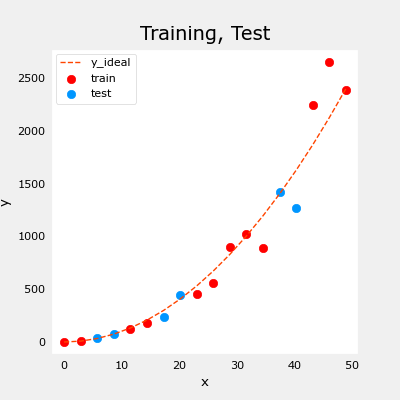

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ###
        err += (y[i] - yhat[i]) ** 2
    
    err = err / (2 * m)
    
    ### END CODE HERE ### 
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

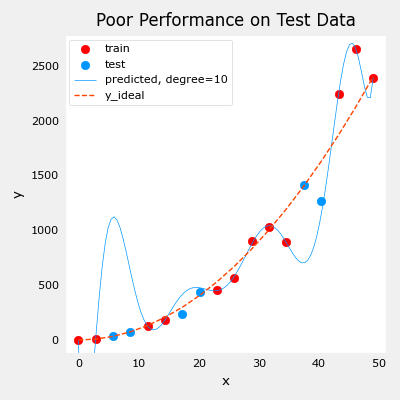

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

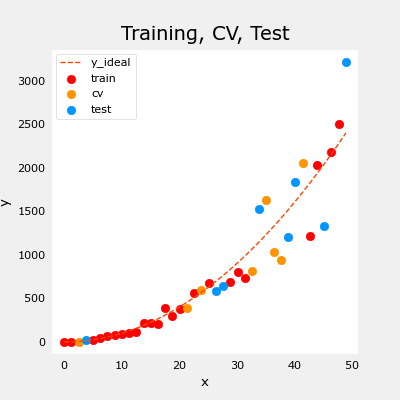

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

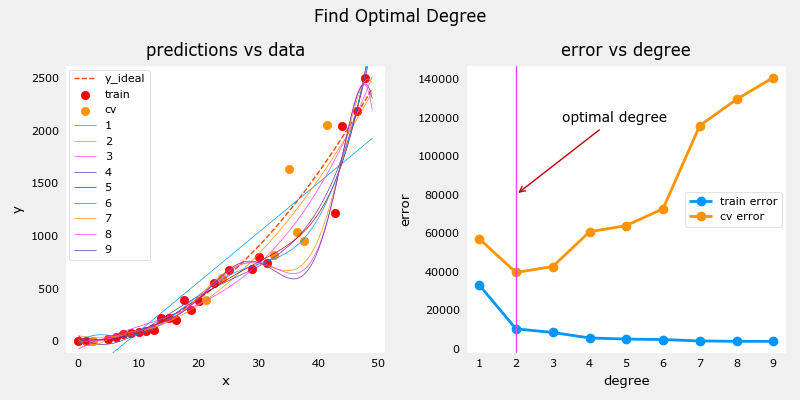

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

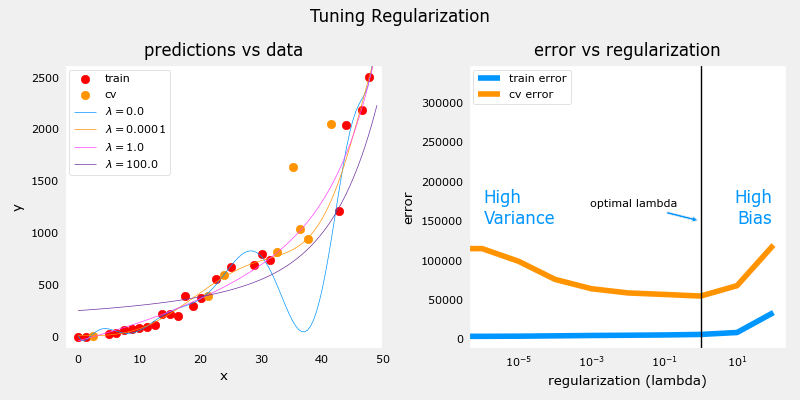

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

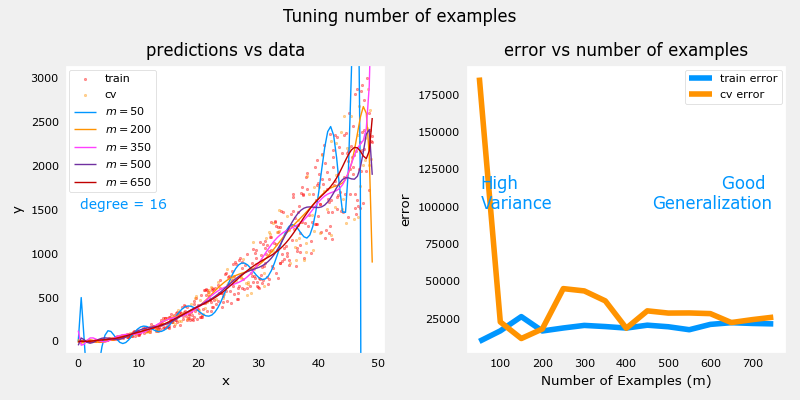

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


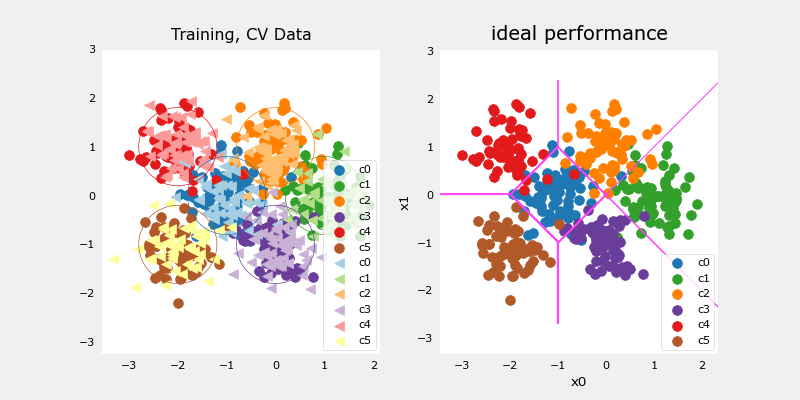

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [18]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
       if yhat[i] != y[i]:
            incorrect += 1
            
    cerr = incorrect / m            
    
    ### END CODE HERE ### 
    
    return(cerr)

In [19]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [20]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(120, activation = 'relu'),
        Dense(40, activation = 'relu'),
        Dense(6, activation = 'linear'),        
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### END CODE HERE ### 
)

In [21]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 917us/step - loss: 1.0670
Epoch 2/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3946
Epoch 3/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3150
Epoch 4/1000
13/13 [==============================] - 0s 667us/step - loss: 0.2788
Epoch 5/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2740
Epoch 6/1000
13/13 [==============================] - 0s 670us/step - loss: 0.2809
Epoch 7/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2384
Epoch 8/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2269
Epoch 9/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2210
Epoch 10/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1989
Epoch 11/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2145
Epoch 12/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2058
E

13/13 [==============================] - 0s 583us/step - loss: 0.1877
Epoch 99/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1845
Epoch 100/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1590
Epoch 101/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1565
Epoch 102/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1604
Epoch 103/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1769
Epoch 104/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1593
Epoch 105/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1445
Epoch 106/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1406
Epoch 107/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1531
Epoch 108/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1358
Epoch 109/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1

13/13 [==============================] - 0s 583us/step - loss: 0.0991
Epoch 195/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1026
Epoch 196/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0978
Epoch 197/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1083
Epoch 198/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0946
Epoch 199/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0982
Epoch 200/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1048
Epoch 201/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1017
Epoch 202/1000
13/13 [==============================] - 0s 625us/step - loss: 0.1055
Epoch 203/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1039
Epoch 204/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1058
Epoch 205/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0620
Epoch 291/1000
13/13 [==============================] - 0s 667us/step - loss: 0.0691
Epoch 292/1000
13/13 [==============================] - 0s 667us/step - loss: 0.0762
Epoch 293/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0661
Epoch 294/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0651
Epoch 295/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0861
Epoch 296/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0952
Epoch 297/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0630
Epoch 298/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0605
Epoch 299/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0523
Epoch 300/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0554
Epoch 301/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.0515
Epoch 387/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0447
Epoch 388/1000
13/13 [==============================] - 0s 625us/step - loss: 0.0492
Epoch 389/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0884
Epoch 390/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0714
Epoch 391/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0511
Epoch 392/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0401
Epoch 393/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0454
Epoch 394/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0550
Epoch 395/1000
13/13 [==============================] - 0s 667us/step - loss: 0.0501
Epoch 396/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0479
Epoch 397/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.0986
Epoch 483/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1166
Epoch 484/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0794
Epoch 485/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0970
Epoch 486/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1012
Epoch 487/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1013
Epoch 488/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0884
Epoch 489/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0863
Epoch 490/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1016
Epoch 491/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1175
Epoch 492/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1922
Epoch 493/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0700
Epoch 579/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0436
Epoch 580/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0462
Epoch 581/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0496
Epoch 582/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0535
Epoch 583/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0468
Epoch 584/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0456
Epoch 585/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0512
Epoch 586/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0498
Epoch 587/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0366
Epoch 588/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0425
Epoch 589/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.1094
Epoch 675/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1176
Epoch 676/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0735
Epoch 677/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0605
Epoch 678/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0545
Epoch 679/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0449
Epoch 680/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0419
Epoch 681/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0400
Epoch 682/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0349
Epoch 683/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0359
Epoch 684/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0367
Epoch 685/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0335
Epoch 771/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0321
Epoch 772/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0303
Epoch 773/1000
13/13 [==============================] - 0s 616us/step - loss: 0.0340
Epoch 774/1000
13/13 [==============================] - 0s 608us/step - loss: 0.0332
Epoch 775/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0313
Epoch 776/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0309
Epoch 777/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0308
Epoch 778/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0335
Epoch 779/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0356
Epoch 780/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0316
Epoch 781/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 513us/step - loss: 0.0313
Epoch 867/1000
13/13 [==============================] - 0s 580us/step - loss: 0.0346
Epoch 868/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0346
Epoch 869/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0322
Epoch 870/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0349
Epoch 871/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0267
Epoch 872/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0289
Epoch 873/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0281
Epoch 874/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0252
Epoch 875/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0307
Epoch 876/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0302
Epoch 877/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0410
Epoch 963/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0448
Epoch 964/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0376
Epoch 965/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0416
Epoch 966/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0353
Epoch 967/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0446
Epoch 968/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0484
Epoch 969/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0863
Epoch 970/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0622
Epoch 971/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0603
Epoch 972/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0605
Epoch 973/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

In [22]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 0s 360us/step


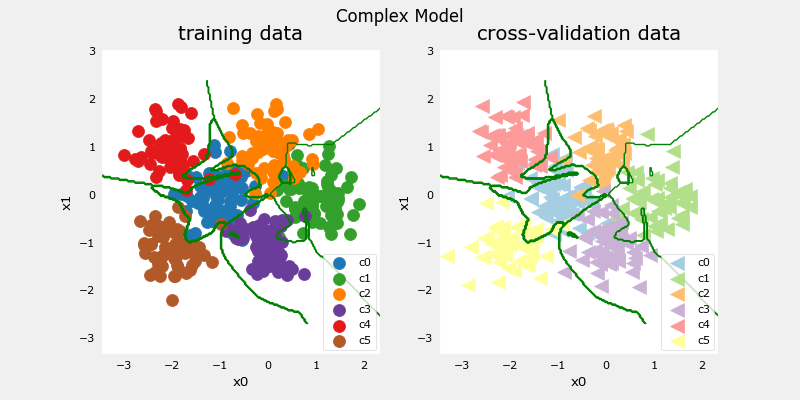

In [23]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [24]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 500us/step
categorization error, training, complex model: 0.015
categorization error, cv,       complex model: 0.106


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [25]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(6, activation = 'relu'),
        Dense(6, activation = 'linear'),
        
        
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [26]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 737us/step - loss: 1.7416
Epoch 2/1000
13/13 [==============================] - 0s 500us/step - loss: 1.4454
Epoch 3/1000
13/13 [==============================] - 0s 500us/step - loss: 1.2386
Epoch 4/1000
13/13 [==============================] - 0s 500us/step - loss: 1.0654
Epoch 5/1000
13/13 [==============================] - 0s 500us/step - loss: 0.9296
Epoch 6/1000
13/13 [==============================] - 0s 500us/step - loss: 0.8114
Epoch 7/1000
13/13 [==============================] - 0s 459us/step - loss: 0.7131
Epoch 8/1000
13/13 [==============================] - 0s 417us/step - loss: 0.6201
Epoch 9/1000
13/13 [==============================] - 0s 417us/step - loss: 0.5376
Epoch 10/1000
13/13 [==============================] - 0s 417us/step - loss: 0.4627
Epoch 11/1000
13/13 [==============================] - 0s 417us/step - loss: 0.4117
Epoch 12/1000
13/13 [==============================] - 0s 417us/step - loss: 0.3735
E

13/13 [==============================] - 0s 500us/step - loss: 0.1932
Epoch 99/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1886
Epoch 100/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1923
Epoch 101/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1927
Epoch 102/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1915
Epoch 103/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1922
Epoch 104/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1891
Epoch 105/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1878
Epoch 106/1000
13/13 [==============================] - 0s 416us/step - loss: 0.1879
Epoch 107/1000
13/13 [==============================] - 0s 432us/step - loss: 0.1865
Epoch 108/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1871
Epoch 109/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1

13/13 [==============================] - 0s 417us/step - loss: 0.1789
Epoch 195/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1787
Epoch 196/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1795
Epoch 197/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1810
Epoch 198/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1813
Epoch 199/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1814
Epoch 200/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1792
Epoch 201/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1798
Epoch 202/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1768
Epoch 203/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1793
Epoch 204/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1796
Epoch 205/1000
13/13 [==============================] - 0s 417us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1745
Epoch 291/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1728
Epoch 292/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1731
Epoch 293/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1750
Epoch 294/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1720
Epoch 295/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1805
Epoch 296/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1751
Epoch 297/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1794
Epoch 298/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1752
Epoch 299/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1727
Epoch 300/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1769
Epoch 301/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 417us/step - loss: 0.1709
Epoch 387/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1713
Epoch 388/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1756
Epoch 389/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1734
Epoch 390/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1719
Epoch 391/1000
13/13 [==============================] - 0s 459us/step - loss: 0.1720
Epoch 392/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1698
Epoch 393/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1695
Epoch 394/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1697
Epoch 395/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1710
Epoch 396/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1737
Epoch 397/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 417us/step - loss: 0.1688
Epoch 483/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1707
Epoch 484/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1720
Epoch 485/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1717
Epoch 486/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1686
Epoch 487/1000
13/13 [==============================] - 0s 459us/step - loss: 0.1723
Epoch 488/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1692
Epoch 489/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1711
Epoch 490/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1744
Epoch 491/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1713
Epoch 492/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1691
Epoch 493/1000
13/13 [==============================] - 0s 750us/step - loss: 0.

13/13 [==============================] - 0s 417us/step - loss: 0.1683
Epoch 579/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1675
Epoch 580/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1693
Epoch 581/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1680
Epoch 582/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1666
Epoch 583/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1676
Epoch 584/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1705
Epoch 585/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1666
Epoch 586/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1682
Epoch 587/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1694
Epoch 588/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1678
Epoch 589/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1700
Epoch 675/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1661
Epoch 676/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1675
Epoch 677/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1672
Epoch 678/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1680
Epoch 679/1000
13/13 [==============================] - 0s 459us/step - loss: 0.1720
Epoch 680/1000
13/13 [==============================] - 0s 392us/step - loss: 0.1676
Epoch 681/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1661
Epoch 682/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1663
Epoch 683/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1717
Epoch 684/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1674
Epoch 685/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1649
Epoch 771/1000
13/13 [==============================] - 0s 516us/step - loss: 0.1691
Epoch 772/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1655
Epoch 773/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1669
Epoch 774/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1706
Epoch 775/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1665
Epoch 776/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1658
Epoch 777/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1675
Epoch 778/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1675
Epoch 779/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1689
Epoch 780/1000
13/13 [==============================] - 0s 449us/step - loss: 0.1712
Epoch 781/1000
13/13 [==============================] - 0s 510us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1680
Epoch 867/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1656
Epoch 868/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1672
Epoch 869/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1650
Epoch 870/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1659
Epoch 871/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1648
Epoch 872/1000
13/13 [==============================] - 0s 459us/step - loss: 0.1650
Epoch 873/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1669
Epoch 874/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1656
Epoch 875/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1654
Epoch 876/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1649
Epoch 877/1000
13/13 [==============================] - 0s 417us/step - loss: 0.

13/13 [==============================] - 0s 417us/step - loss: 0.1650
Epoch 963/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1691
Epoch 964/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1652
Epoch 965/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1663
Epoch 966/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1653
Epoch 967/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1683
Epoch 968/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1697
Epoch 969/1000
13/13 [==============================] - 0s 459us/step - loss: 0.1665
Epoch 970/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1656
Epoch 971/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1641
Epoch 972/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1652
Epoch 973/1000
13/13 [==============================] - 0s 417us/step - loss: 0.

In [27]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 337us/step


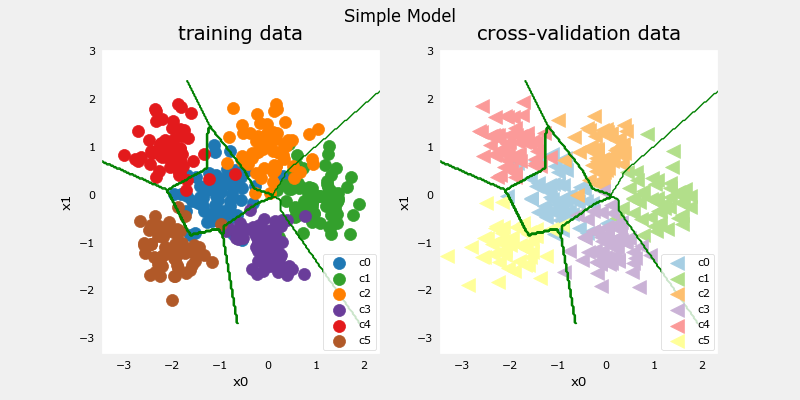

In [28]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [29]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 453us/step
categorization error, training, simple model, 0.060, complex model: 0.015
categorization error, cv,       simple model, 0.081, complex model: 0.106


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [30]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6, activation = 'linear'),
        
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [31]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 834us/step - loss: 4.4714
Epoch 2/1000
13/13 [==============================] - 0s 667us/step - loss: 1.6552
Epoch 3/1000
13/13 [==============================] - 0s 667us/step - loss: 1.3019
Epoch 4/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0612
Epoch 5/1000
13/13 [==============================] - 0s 667us/step - loss: 0.9957
Epoch 6/1000
13/13 [==============================] - 0s 667us/step - loss: 0.9597
Epoch 7/1000
13/13 [==============================] - 0s 667us/step - loss: 0.9321
Epoch 8/1000
13/13 [==============================] - 0s 500us/step - loss: 0.8953
Epoch 9/1000
13/13 [==============================] - 0s 583us/step - loss: 0.8224
Epoch 10/1000
13/13 [==============================] - 0s 583us/step - loss: 0.7742
Epoch 11/1000
13/13 [==============================] - 0s 583us/step - loss: 0.7649
Epoch 12/1000
13/13 [==============================] - 0s 584us/step - loss: 0.7623
E

13/13 [==============================] - 0s 583us/step - loss: 0.4661
Epoch 99/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4937
Epoch 100/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4944
Epoch 101/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4812
Epoch 102/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4700
Epoch 103/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4687
Epoch 104/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4601
Epoch 105/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5047
Epoch 106/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4627
Epoch 107/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4578
Epoch 108/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4696
Epoch 109/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4

13/13 [==============================] - 0s 667us/step - loss: 0.4157
Epoch 195/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4025
Epoch 196/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3972
Epoch 197/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4195
Epoch 198/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3986
Epoch 199/1000
13/13 [==============================] - 0s 598us/step - loss: 0.4085
Epoch 200/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4054
Epoch 201/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4318
Epoch 202/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3982
Epoch 203/1000
13/13 [==============================] - 0s 702us/step - loss: 0.4029
Epoch 204/1000
13/13 [==============================] - 0s 501us/step - loss: 0.4078
Epoch 205/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3870
Epoch 291/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3915
Epoch 292/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3686
Epoch 293/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3783
Epoch 294/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3965
Epoch 295/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4176
Epoch 296/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3859
Epoch 297/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3904
Epoch 298/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4042
Epoch 299/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3972
Epoch 300/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4293
Epoch 301/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 667us/step - loss: 0.3566
Epoch 387/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3781
Epoch 388/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3746
Epoch 389/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3671
Epoch 390/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3535
Epoch 391/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3655
Epoch 392/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3812
Epoch 393/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3596
Epoch 394/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3626
Epoch 395/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3888
Epoch 396/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3814
Epoch 397/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3759
Epoch 483/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3796
Epoch 484/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3732
Epoch 485/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3773
Epoch 486/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3528
Epoch 487/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3453
Epoch 488/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3489
Epoch 489/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3374
Epoch 490/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3541
Epoch 491/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3670
Epoch 492/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3678
Epoch 493/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4075
Epoch 579/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3526
Epoch 580/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3332
Epoch 581/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3570
Epoch 582/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3484
Epoch 583/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3515
Epoch 584/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3745
Epoch 585/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3826
Epoch 586/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3573
Epoch 587/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3482
Epoch 588/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3358
Epoch 589/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3994
Epoch 675/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3387
Epoch 676/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3362
Epoch 677/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3321
Epoch 678/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3286
Epoch 679/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3407
Epoch 680/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3363
Epoch 681/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3484
Epoch 682/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3350
Epoch 683/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3329
Epoch 684/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3379
Epoch 685/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3267
Epoch 771/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3503
Epoch 772/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3214
Epoch 773/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3510
Epoch 774/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3715
Epoch 775/1000
13/13 [==============================] - 0s 501us/step - loss: 0.3380
Epoch 776/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3689
Epoch 777/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3636
Epoch 778/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3214
Epoch 779/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3286
Epoch 780/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3536
Epoch 781/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 667us/step - loss: 0.3713
Epoch 867/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3338
Epoch 868/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3331
Epoch 869/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3401
Epoch 870/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3594
Epoch 871/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3629
Epoch 872/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3405
Epoch 873/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3355
Epoch 874/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3481
Epoch 875/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3362
Epoch 876/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3343
Epoch 877/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3178
Epoch 963/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3361
Epoch 964/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3174
Epoch 965/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3260
Epoch 966/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3454
Epoch 967/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3264
Epoch 968/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3365
Epoch 969/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3857
Epoch 970/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3778
Epoch 971/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3461
Epoch 972/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3412
Epoch 973/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

In [32]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 120)               360       
                                                                 
 dense_6 (Dense)             (None, 40)                4840      
                                                                 
 dense_7 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 351us/step


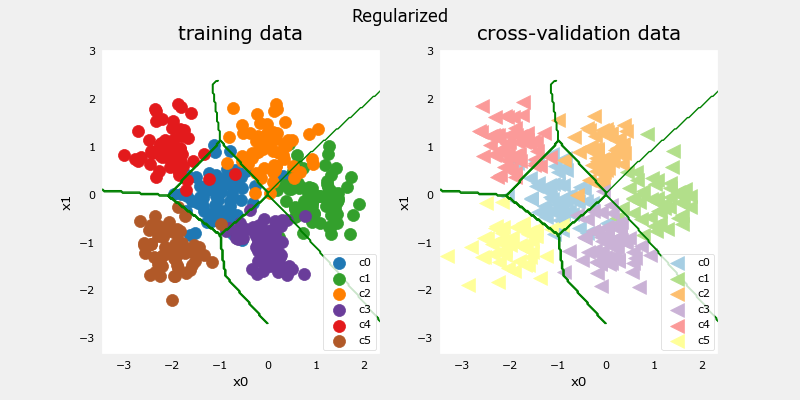

In [33]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [34]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 500us/step
categorization error, training, regularized: 0.068, simple model, 0.060, complex model: 0.015
categorization error, cv,       regularized: 0.059, simple model, 0.081, complex model: 0.106


The simple model is a bit better in the training set than the regularized model but worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [35]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 750us/step - loss: 1.1739
Epoch 2/1000
13/13 [==============================] - 0s 626us/step - loss: 0.4198
Epoch 3/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3151
Epoch 4/1000
13/13 [==============================] - 0s 667us/step - loss: 0.2752
Epoch 5/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2753
Epoch 6/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2973
Epoch 7/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2709
Epoch 8/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2318
Epoch 9/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2345
Epoch 10/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2100
Epoch 11/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2196
Epoch 12/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2161
E

13/13 [==============================] - 0s 500us/step - loss: 0.1942
Epoch 99/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1808
Epoch 100/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1658
Epoch 101/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1779
Epoch 102/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1618
Epoch 103/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1962
Epoch 104/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1700
Epoch 105/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1530
Epoch 106/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1441
Epoch 107/1000
13/13 [==============================] - 0s 595us/step - loss: 0.1582
Epoch 108/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1506
Epoch 109/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1

13/13 [==============================] - 0s 583us/step - loss: 0.1077
Epoch 195/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1016
Epoch 196/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0982
Epoch 197/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1055
Epoch 198/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1138
Epoch 199/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1115
Epoch 200/1000
13/13 [==============================] - 0s 695us/step - loss: 0.1115
Epoch 201/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1041
Epoch 202/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1061
Epoch 203/1000
13/13 [==============================] - 0s 667us/step - loss: 0.0952
Epoch 204/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1029
Epoch 205/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0779
Epoch 291/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0703
Epoch 292/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0745
Epoch 293/1000
13/13 [==============================] - 0s 502us/step - loss: 0.0770
Epoch 294/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0679
Epoch 295/1000
13/13 [==============================] - 0s 625us/step - loss: 0.0711
Epoch 296/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0777
Epoch 297/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0742
Epoch 298/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0721
Epoch 299/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0686
Epoch 300/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0790
Epoch 301/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.0716
Epoch 387/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0705
Epoch 388/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0824
Epoch 389/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0793
Epoch 390/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0684
Epoch 391/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0572
Epoch 392/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0552
Epoch 393/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0533
Epoch 394/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0591
Epoch 395/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0608
Epoch 396/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0653
Epoch 397/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0574
Epoch 483/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0669
Epoch 484/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1203
Epoch 485/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1240
Epoch 486/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1027
Epoch 487/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0782
Epoch 488/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0819
Epoch 489/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0664
Epoch 490/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0840
Epoch 491/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1089
Epoch 492/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1132
Epoch 493/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.1034
Epoch 579/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0999
Epoch 580/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1012
Epoch 581/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1345
Epoch 582/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0665
Epoch 583/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0471
Epoch 584/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0362
Epoch 585/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0373
Epoch 586/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0323
Epoch 587/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0331
Epoch 588/1000
13/13 [==============================] - 0s 580us/step - loss: 0.0316
Epoch 589/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1566
Epoch 675/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1092
Epoch 676/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0710
Epoch 677/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0479
Epoch 678/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0396
Epoch 679/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0366
Epoch 680/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0505
Epoch 681/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0610
Epoch 682/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0673
Epoch 683/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1106
Epoch 684/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1244
Epoch 685/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0959
Epoch 771/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1257
Epoch 772/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0694
Epoch 773/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1113
Epoch 774/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0518
Epoch 775/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0402
Epoch 776/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0597
Epoch 777/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0590
Epoch 778/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0394
Epoch 779/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0294
Epoch 780/1000
13/13 [==============================] - 0s 543us/step - loss: 0.0352
Epoch 781/1000
13/13 [==============================] - 0s 589us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.0302
Epoch 867/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0203
Epoch 868/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0235
Epoch 869/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0277
Epoch 870/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0302
Epoch 871/1000
13/13 [==============================] - 0s 449us/step - loss: 0.0229
Epoch 872/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0283
Epoch 873/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0189
Epoch 874/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0330
Epoch 875/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0380
Epoch 876/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0370
Epoch 877/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0136
Epoch 963/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0102
Epoch 964/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0093
Epoch 965/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0177
Epoch 966/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0192
Epoch 967/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0314
Epoch 968/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0328
Epoch 969/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0463
Epoch 970/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0479
Epoch 971/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0924
Epoch 972/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0949
Epoch 973/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2552
Epoch 60/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2600
Epoch 61/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2497
Epoch 62/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2326
Epoch 63/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2285
Epoch 64/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2678
Epoch 65/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2610
Epoch 66/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2554
Epoch 67/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2895
Epoch 68/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3002
Epoch 69/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2528
Epoch 70/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2491
Epoch 

13/13 [==============================] - 0s 583us/step - loss: 0.2202
Epoch 157/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2250
Epoch 158/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2210
Epoch 159/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2021
Epoch 160/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2042
Epoch 161/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2074
Epoch 162/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2158
Epoch 163/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2245
Epoch 164/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2267
Epoch 165/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2220
Epoch 166/1000
13/13 [==============================] - 0s 514us/step - loss: 0.2101
Epoch 167/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 531us/step - loss: 0.1912
Epoch 253/1000
13/13 [==============================] - 0s 545us/step - loss: 0.1937
Epoch 254/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2017
Epoch 255/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2002
Epoch 256/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2004
Epoch 257/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2141
Epoch 258/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2055
Epoch 259/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1867
Epoch 260/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1959
Epoch 261/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2030
Epoch 262/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1970
Epoch 263/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.2044
Epoch 349/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1833
Epoch 350/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1809
Epoch 351/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1849
Epoch 352/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1881
Epoch 353/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1942
Epoch 354/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1851
Epoch 355/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1909
Epoch 356/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1802
Epoch 357/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1778
Epoch 358/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1852
Epoch 359/1000
13/13 [==============================] - 0s 667us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.1731
Epoch 445/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1824
Epoch 446/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1933
Epoch 447/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1845
Epoch 448/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1769
Epoch 449/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1740
Epoch 450/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1791
Epoch 451/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1839
Epoch 452/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1775
Epoch 453/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1799
Epoch 454/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1767
Epoch 455/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.1725
Epoch 541/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1854
Epoch 542/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1724
Epoch 543/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1762
Epoch 544/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1677
Epoch 545/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1694
Epoch 546/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1691
Epoch 547/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1715
Epoch 548/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1648
Epoch 549/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1770
Epoch 550/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1869
Epoch 551/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.1770
Epoch 637/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1729
Epoch 638/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1677
Epoch 639/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1610
Epoch 640/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1649
Epoch 641/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1663
Epoch 642/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1611
Epoch 643/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1629
Epoch 644/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1603
Epoch 645/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1702
Epoch 646/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1657
Epoch 647/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1886
Epoch 733/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1692
Epoch 734/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1715
Epoch 735/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1721
Epoch 736/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1757
Epoch 737/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1635
Epoch 738/1000
13/13 [==============================] - 0s 608us/step - loss: 0.1754
Epoch 739/1000
13/13 [==============================] - 0s 628us/step - loss: 0.1718
Epoch 740/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1553
Epoch 741/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1713
Epoch 742/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1607
Epoch 743/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.1668
Epoch 829/1000
13/13 [==============================] - 0s 604us/step - loss: 0.1613
Epoch 830/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1589
Epoch 831/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1536
Epoch 832/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1528
Epoch 833/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1564
Epoch 834/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1493
Epoch 835/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1515
Epoch 836/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1610
Epoch 837/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1558
Epoch 838/1000
13/13 [==============================] - 0s 535us/step - loss: 0.1516
Epoch 839/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.1577
Epoch 925/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1554
Epoch 926/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1501
Epoch 927/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1546
Epoch 928/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1515
Epoch 929/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1562
Epoch 930/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1533
Epoch 931/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1684
Epoch 932/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1531
Epoch 933/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1571
Epoch 934/1000
13/13 [==============================] - 0s 542us/step - loss: 0.1518
Epoch 935/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3664
Epoch 21/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3646
Epoch 22/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3713
Epoch 23/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3640
Epoch 24/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3585
Epoch 25/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4450
Epoch 26/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4044
Epoch 27/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4023
Epoch 28/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3737
Epoch 29/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3437
Epoch 30/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3608
Epoch 31/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3568
Epoch 

13/13 [==============================] - 0s 584us/step - loss: 0.2775
Epoch 118/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2743
Epoch 119/1000
13/13 [==============================] - 0s 626us/step - loss: 0.2948
Epoch 120/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3180
Epoch 121/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3224
Epoch 122/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3021
Epoch 123/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2900
Epoch 124/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2756
Epoch 125/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2716
Epoch 126/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2805
Epoch 127/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2989
Epoch 128/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2674
Epoch 214/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2666
Epoch 215/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2634
Epoch 216/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2621
Epoch 217/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2721
Epoch 218/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2746
Epoch 219/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2681
Epoch 220/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2568
Epoch 221/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2563
Epoch 222/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2613
Epoch 223/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2578
Epoch 224/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2549
Epoch 310/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2572
Epoch 311/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2481
Epoch 312/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2466
Epoch 313/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2777
Epoch 314/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2595
Epoch 315/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2616
Epoch 316/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2565
Epoch 317/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2509
Epoch 318/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2525
Epoch 319/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2749
Epoch 320/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.2477
Epoch 406/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2384
Epoch 407/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2360
Epoch 408/1000
13/13 [==============================] - 0s 625us/step - loss: 0.2550
Epoch 409/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2481
Epoch 410/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2414
Epoch 411/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2667
Epoch 412/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2550
Epoch 413/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2431
Epoch 414/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2444
Epoch 415/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2602
Epoch 416/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 502us/step - loss: 0.2466
Epoch 502/1000
13/13 [==============================] - 0s 628us/step - loss: 0.2603
Epoch 503/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2671
Epoch 504/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2418
Epoch 505/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2421
Epoch 506/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2427
Epoch 507/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2458
Epoch 508/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2326
Epoch 509/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2421
Epoch 510/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2391
Epoch 511/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2375
Epoch 512/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 542us/step - loss: 0.2397
Epoch 598/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2417
Epoch 599/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2403
Epoch 600/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2403
Epoch 601/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2287
Epoch 602/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2480
Epoch 603/1000
13/13 [==============================] - 0s 750us/step - loss: 0.2772
Epoch 604/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2612
Epoch 605/1000
13/13 [==============================] - 0s 667us/step - loss: 0.2376
Epoch 606/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2499
Epoch 607/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2338
Epoch 608/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2289
Epoch 694/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2408
Epoch 695/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2362
Epoch 696/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2303
Epoch 697/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2387
Epoch 698/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2403
Epoch 699/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2270
Epoch 700/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2318
Epoch 701/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2220
Epoch 702/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2233
Epoch 703/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2414
Epoch 704/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.2260
Epoch 790/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2296
Epoch 791/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2290
Epoch 792/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2354
Epoch 793/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2278
Epoch 794/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2435
Epoch 795/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2223
Epoch 796/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2410
Epoch 797/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2331
Epoch 798/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2385
Epoch 799/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2297
Epoch 800/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2466
Epoch 886/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2285
Epoch 887/1000
13/13 [==============================] - 0s 667us/step - loss: 0.2240
Epoch 888/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2321
Epoch 889/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2273
Epoch 890/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2288
Epoch 891/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2304
Epoch 892/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2215
Epoch 893/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2374
Epoch 894/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2384
Epoch 895/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2419
Epoch 896/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2153
Epoch 982/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 983/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2380
Epoch 984/1000
13/13 [==============================] - 0s 516us/step - loss: 0.2199
Epoch 985/1000
13/13 [==============================] - 0s 554us/step - loss: 0.2264
Epoch 986/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2294
Epoch 987/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2172
Epoch 988/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2196
Epoch 989/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2340
Epoch 990/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2338
Epoch 991/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2262
Epoch 992/1000
13/13 [==============================] - 0s 584us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4255
Epoch 79/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4458
Epoch 80/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4205
Epoch 81/1000
13/13 [==============================] - 0s 917us/step - loss: 0.4341
Epoch 82/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4052
Epoch 83/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3976
Epoch 84/1000
13/13 [==============================] - 0s 750us/step - loss: 0.3848
Epoch 85/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4049
Epoch 86/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3972
Epoch 87/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4221
Epoch 88/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4049
Epoch 89/1000
13/13 [==============================] - 0s 623us/step - loss: 0.3962
Epoch 

13/13 [==============================] - 0s 583us/step - loss: 0.3917
Epoch 175/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3714
Epoch 176/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3897
Epoch 177/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3724
Epoch 178/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3505
Epoch 179/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3588
Epoch 180/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3508
Epoch 181/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3784
Epoch 182/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3684
Epoch 183/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3549
Epoch 184/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3416
Epoch 185/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3385
Epoch 271/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3352
Epoch 272/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3356
Epoch 273/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3553
Epoch 274/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3272
Epoch 275/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3404
Epoch 276/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3352
Epoch 277/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3274
Epoch 278/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3323
Epoch 279/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3500
Epoch 280/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3423
Epoch 281/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3167
Epoch 367/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3286
Epoch 368/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3494
Epoch 369/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3646
Epoch 370/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3334
Epoch 371/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3204
Epoch 372/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3181
Epoch 373/1000
13/13 [==============================] - 0s 525us/step - loss: 0.3368
Epoch 374/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3120
Epoch 375/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3343
Epoch 376/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3227
Epoch 377/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3172
Epoch 463/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3179
Epoch 464/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3208
Epoch 465/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3245
Epoch 466/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3455
Epoch 467/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3508
Epoch 468/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3582
Epoch 469/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3073
Epoch 470/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3111
Epoch 471/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3184
Epoch 472/1000
13/13 [==============================] - 0s 499us/step - loss: 0.3267
Epoch 473/1000
13/13 [==============================] - 0s 578us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3029
Epoch 559/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3187
Epoch 560/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3065
Epoch 561/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2915
Epoch 562/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3055
Epoch 563/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3159
Epoch 564/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3245
Epoch 565/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3060
Epoch 566/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3024
Epoch 567/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3049
Epoch 568/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2976
Epoch 569/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.3127
Epoch 655/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2934
Epoch 656/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2888
Epoch 657/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3041
Epoch 658/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3072
Epoch 659/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3202
Epoch 660/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3251
Epoch 661/1000
13/13 [==============================] - 0s 539us/step - loss: 0.3002
Epoch 662/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3184
Epoch 663/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3302
Epoch 664/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3083
Epoch 665/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3298
Epoch 751/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3021
Epoch 752/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3384
Epoch 753/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3064
Epoch 754/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2885
Epoch 755/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2975
Epoch 756/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3133
Epoch 757/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2994
Epoch 758/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3003
Epoch 759/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2910
Epoch 760/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3034
Epoch 761/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.2816
Epoch 847/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3002
Epoch 848/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3005
Epoch 849/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2714
Epoch 850/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2859
Epoch 851/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2865
Epoch 852/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3141
Epoch 853/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3243
Epoch 854/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2980
Epoch 855/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2853
Epoch 856/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2827
Epoch 857/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.2746
Epoch 943/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2968
Epoch 944/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3159
Epoch 945/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3154
Epoch 946/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2799
Epoch 947/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2895
Epoch 948/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2883
Epoch 949/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2804
Epoch 950/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2819
Epoch 951/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2732
Epoch 952/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3165
Epoch 953/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.5479
Epoch 39/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5502
Epoch 40/1000
13/13 [==============================] - 0s 532us/step - loss: 0.5498
Epoch 41/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5646
Epoch 42/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5435
Epoch 43/1000
13/13 [==============================] - 0s 582us/step - loss: 0.5578
Epoch 44/1000
13/13 [==============================] - 0s 577us/step - loss: 0.5609
Epoch 45/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5638
Epoch 46/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5456
Epoch 47/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5109
Epoch 48/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5555
Epoch 49/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5379
Epoch 

13/13 [==============================] - 0s 500us/step - loss: 0.4300
Epoch 136/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4385
Epoch 137/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4153
Epoch 138/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4303
Epoch 139/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4379
Epoch 140/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4411
Epoch 141/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4192
Epoch 142/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4087
Epoch 143/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4225
Epoch 144/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4267
Epoch 145/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4112
Epoch 146/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 667us/step - loss: 0.3892
Epoch 232/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4017
Epoch 233/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3789
Epoch 234/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3764
Epoch 235/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3755
Epoch 236/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3827
Epoch 237/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3813
Epoch 238/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4118
Epoch 239/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4063
Epoch 240/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3832
Epoch 241/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3806
Epoch 242/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3668
Epoch 328/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3926
Epoch 329/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3704
Epoch 330/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3542
Epoch 331/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3581
Epoch 332/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3629
Epoch 333/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4031
Epoch 334/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3837
Epoch 335/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3898
Epoch 336/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4021
Epoch 337/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4099
Epoch 338/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3599
Epoch 424/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3649
Epoch 425/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3485
Epoch 426/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3475
Epoch 427/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3534
Epoch 428/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3606
Epoch 429/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3604
Epoch 430/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3624
Epoch 431/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3448
Epoch 432/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3531
Epoch 433/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3833
Epoch 434/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3508
Epoch 520/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3609
Epoch 521/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3414
Epoch 522/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3473
Epoch 523/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3707
Epoch 524/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3256
Epoch 525/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3429
Epoch 526/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3481
Epoch 527/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3254
Epoch 528/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3321
Epoch 529/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3705
Epoch 530/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3564
Epoch 616/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3382
Epoch 617/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3158
Epoch 618/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3632
Epoch 619/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3986
Epoch 620/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3869
Epoch 621/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3304
Epoch 622/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3261
Epoch 623/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3290
Epoch 624/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3174
Epoch 625/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3155
Epoch 626/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3411
Epoch 712/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3793
Epoch 713/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3528
Epoch 714/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3401
Epoch 715/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3158
Epoch 716/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3201
Epoch 717/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3458
Epoch 718/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3571
Epoch 719/1000
13/13 [==============================] - 0s 509us/step - loss: 0.4167
Epoch 720/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3998
Epoch 721/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3809
Epoch 722/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3215
Epoch 808/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3461
Epoch 809/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3637
Epoch 810/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3371
Epoch 811/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3193
Epoch 812/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3135
Epoch 813/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3189
Epoch 814/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3232
Epoch 815/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3356
Epoch 816/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3287
Epoch 817/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3368
Epoch 818/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.3286
Epoch 904/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3146
Epoch 905/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3223
Epoch 906/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3420
Epoch 907/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3400
Epoch 908/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3617
Epoch 909/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4187
Epoch 910/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3799
Epoch 911/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3173
Epoch 912/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3153
Epoch 913/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3155
Epoch 914/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3312
Epoch 1000/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3392
Finished lambda = 0.1
Epoch 1/1000
13/13 [==============================] - 0s 661us/step - loss: 7.1722
Epoch 2/1000
13/13 [==============================] - 0s 583us/step - loss: 2.0950
Epoch 3/1000
13/13 [==============================] - 0s 583us/step - loss: 1.8482
Epoch 4/1000
13/13 [==============================] - 0s 583us/step - loss: 1.4850
Epoch 5/1000
13/13 [==============================] - 0s 500us/step - loss: 1.3293
Epoch 6/1000
13/13 [==============================] - 0s 531us/step - loss: 1.2442
Epoch 7/1000
13/13 [==============================] - 0s 453us/step - loss: 1.1750
Epoch 8/1000
13/13 [==============================] - 0s 500us/step - loss: 1.1179
Epoch 9/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0581
Epoch 10/1000
13/13 [==============================] - 0s 500us/step - loss

13/13 [==============================] - 0s 583us/step - loss: 0.5691
Epoch 97/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5760
Epoch 98/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5831
Epoch 99/1000
13/13 [==============================] - 0s 500us/step - loss: 0.6199
Epoch 100/1000
13/13 [==============================] - 0s 583us/step - loss: 0.6335
Epoch 101/1000
13/13 [==============================] - 0s 583us/step - loss: 0.6251
Epoch 102/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5942
Epoch 103/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5834
Epoch 104/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5741
Epoch 105/1000
13/13 [==============================] - 0s 584us/step - loss: 0.6237
Epoch 106/1000
13/13 [==============================] - 0s 583us/step - loss: 0.6118
Epoch 107/1000
13/13 [==============================] - 0s 626us/step - loss: 0.581

13/13 [==============================] - 0s 667us/step - loss: 0.5077
Epoch 193/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4958
Epoch 194/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4928
Epoch 195/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4871
Epoch 196/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4821
Epoch 197/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5021
Epoch 198/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4797
Epoch 199/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4900
Epoch 200/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4895
Epoch 201/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5084
Epoch 202/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4790
Epoch 203/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4753
Epoch 289/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4528
Epoch 290/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4590
Epoch 291/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4635
Epoch 292/1000
13/13 [==============================] - 0s 597us/step - loss: 0.4396
Epoch 293/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4465
Epoch 294/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4542
Epoch 295/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4820
Epoch 296/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4550
Epoch 297/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4486
Epoch 298/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4578
Epoch 299/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.4216
Epoch 385/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4291
Epoch 386/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4153
Epoch 387/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4329
Epoch 388/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4264
Epoch 389/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4245
Epoch 390/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4150
Epoch 391/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4265
Epoch 392/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4318
Epoch 393/1000
13/13 [==============================] - 0s 628us/step - loss: 0.4226
Epoch 394/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4442
Epoch 395/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4633
Epoch 481/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4319
Epoch 482/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4291
Epoch 483/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4728
Epoch 484/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4359
Epoch 485/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4607
Epoch 486/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4163
Epoch 487/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3994
Epoch 488/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4016
Epoch 489/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3896
Epoch 490/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4068
Epoch 491/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3985
Epoch 577/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3920
Epoch 578/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4957
Epoch 579/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4449
Epoch 580/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4018
Epoch 581/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4141
Epoch 582/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4039
Epoch 583/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4010
Epoch 584/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4132
Epoch 585/1000
13/13 [==============================] - 0s 626us/step - loss: 0.4103
Epoch 586/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4307
Epoch 587/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3921
Epoch 673/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3887
Epoch 674/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4097
Epoch 675/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3800
Epoch 676/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3813
Epoch 677/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3858
Epoch 678/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3812
Epoch 679/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3873
Epoch 680/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3810
Epoch 681/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3995
Epoch 682/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3820
Epoch 683/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4055
Epoch 769/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4060
Epoch 770/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3875
Epoch 771/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3913
Epoch 772/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3867
Epoch 773/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4049
Epoch 774/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4479
Epoch 775/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4094
Epoch 776/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3727
Epoch 777/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3966
Epoch 778/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3689
Epoch 779/1000
13/13 [==============================] - 0s 667us/step - loss: 0.

13/13 [==============================] - 0s 610us/step - loss: 0.4329
Epoch 865/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4341
Epoch 866/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3865
Epoch 867/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3788
Epoch 868/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3682
Epoch 869/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3700
Epoch 870/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3961
Epoch 871/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3928
Epoch 872/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3630
Epoch 873/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3571
Epoch 874/1000
13/13 [==============================] - 0s 504us/step - loss: 0.3659
Epoch 875/1000
13/13 [==============================] - 0s 497us/step - loss: 0.

13/13 [==============================] - 0s 667us/step - loss: 0.3629
Epoch 961/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3712
Epoch 962/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3538
Epoch 963/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3706
Epoch 964/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3551
Epoch 965/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3629
Epoch 966/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3711
Epoch 967/1000
13/13 [==============================] - 0s 500us/step - loss: 0.3660
Epoch 968/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3826
Epoch 969/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4185
Epoch 970/1000
13/13 [==============================] - 0s 709us/step - loss: 0.3987
Epoch 971/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 1.1058
Epoch 58/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0883
Epoch 59/1000
13/13 [==============================] - 0s 583us/step - loss: 1.1052
Epoch 60/1000
13/13 [==============================] - 0s 583us/step - loss: 1.1188
Epoch 61/1000
13/13 [==============================] - 0s 583us/step - loss: 1.1238
Epoch 62/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0823
Epoch 63/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0679
Epoch 64/1000
13/13 [==============================] - 0s 583us/step - loss: 1.0966
Epoch 65/1000
13/13 [==============================] - 0s 583us/step - loss: 1.1009
Epoch 66/1000
13/13 [==============================] - 0s 584us/step - loss: 1.0645
Epoch 67/1000
13/13 [==============================] - 0s 500us/step - loss: 1.0368
Epoch 68/1000
13/13 [==============================] - 0s 542us/step - loss: 0.9959
Epoch 

13/13 [==============================] - 0s 583us/step - loss: 0.6469
Epoch 155/1000
13/13 [==============================] - 0s 583us/step - loss: 0.6446
Epoch 156/1000
13/13 [==============================] - 0s 583us/step - loss: 0.6329
Epoch 157/1000
13/13 [==============================] - 0s 500us/step - loss: 0.6417
Epoch 158/1000
13/13 [==============================] - 0s 584us/step - loss: 0.6301
Epoch 159/1000
13/13 [==============================] - 0s 500us/step - loss: 0.6428
Epoch 160/1000
13/13 [==============================] - 0s 589us/step - loss: 0.6568
Epoch 161/1000
13/13 [==============================] - 0s 500us/step - loss: 0.7086
Epoch 162/1000
13/13 [==============================] - 0s 583us/step - loss: 0.7249
Epoch 163/1000
13/13 [==============================] - 0s 583us/step - loss: 0.7144
Epoch 164/1000
13/13 [==============================] - 0s 667us/step - loss: 0.6694
Epoch 165/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 500us/step - loss: 0.5712
Epoch 251/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5968
Epoch 252/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5848
Epoch 253/1000
13/13 [==============================] - 0s 542us/step - loss: 0.5671
Epoch 254/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5804
Epoch 255/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5727
Epoch 256/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5663
Epoch 257/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5656
Epoch 258/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5628
Epoch 259/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5636
Epoch 260/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5989
Epoch 261/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 542us/step - loss: 0.5230
Epoch 347/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5358
Epoch 348/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5471
Epoch 349/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5440
Epoch 350/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5314
Epoch 351/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5339
Epoch 352/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5366
Epoch 353/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5231
Epoch 354/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5145
Epoch 355/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5173
Epoch 356/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5141
Epoch 357/1000
13/13 [==============================] - 0s 500us/step - loss: 0.

13/13 [==============================] - 0s 542us/step - loss: 0.5091
Epoch 443/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4945
Epoch 444/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5119
Epoch 445/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5256
Epoch 446/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5417
Epoch 447/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5260
Epoch 448/1000
13/13 [==============================] - 0s 667us/step - loss: 0.5430
Epoch 449/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5233
Epoch 450/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4930
Epoch 451/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5190
Epoch 452/1000
13/13 [==============================] - 0s 584us/step - loss: 0.5236
Epoch 453/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 585us/step - loss: 0.4865
Epoch 539/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4674
Epoch 540/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4788
Epoch 541/1000
13/13 [==============================] - 0s 500us/step - loss: 0.5497
Epoch 542/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4811
Epoch 543/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4763
Epoch 544/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5022
Epoch 545/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4702
Epoch 546/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4640
Epoch 547/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4846
Epoch 548/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4688
Epoch 549/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4907
Epoch 635/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4628
Epoch 636/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4646
Epoch 637/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4438
Epoch 638/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4578
Epoch 639/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4698
Epoch 640/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4943
Epoch 641/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4637
Epoch 642/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4993
Epoch 643/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5329
Epoch 644/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4879
Epoch 645/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4651
Epoch 731/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4666
Epoch 732/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4385
Epoch 733/1000
13/13 [==============================] - 0s 625us/step - loss: 0.4438
Epoch 734/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4522
Epoch 735/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4480
Epoch 736/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4440
Epoch 737/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4673
Epoch 738/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5026
Epoch 739/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4731
Epoch 740/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4597
Epoch 741/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 667us/step - loss: 0.4446
Epoch 827/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4279
Epoch 828/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4499
Epoch 829/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4918
Epoch 830/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4667
Epoch 831/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4345
Epoch 832/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4407
Epoch 833/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4292
Epoch 834/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4349
Epoch 835/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4379
Epoch 836/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4592
Epoch 837/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 585us/step - loss: 0.4548
Epoch 923/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4746
Epoch 924/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4775
Epoch 925/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4385
Epoch 926/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4278
Epoch 927/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4762
Epoch 928/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4362
Epoch 929/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4253
Epoch 930/1000
13/13 [==============================] - 0s 667us/step - loss: 0.4578
Epoch 931/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5195
Epoch 932/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4692
Epoch 933/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

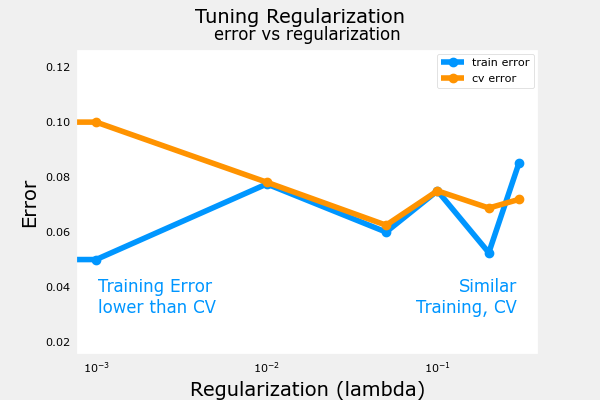

In [36]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 1ms/step


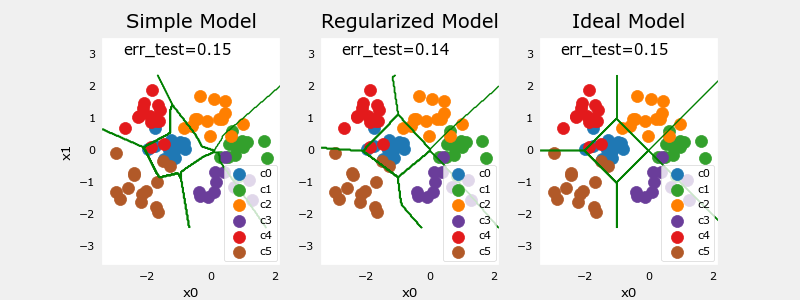

In [37]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://lh3.google.com/u/0/d/14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>